# YOUTUBE CHANNEL ANALYSIS PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity

# 1- Data Exploration

In [2]:
df = pd.read_csv ("D:\Hassam\Internships\Intern Career\youtubers_df.csv")
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [3]:
df.dtypes

Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [6]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [7]:
df.isna()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,True,False,False,False,False,False,False
996,False,False,True,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,True,False,False,False,False,False,False


In [8]:
df.isna().any()

Rank          False
Username      False
Categories     True
Suscribers    False
Country       False
Visits        False
Likes         False
Comments      False
Links         False
dtype: bool

In [9]:
df.isna().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [10]:
df = df.drop('Links', axis=1)
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0


In [11]:
df = df.drop_duplicates(subset=['Username'])
df.drop_duplicates(inplace=True)
df

C:\Users\Abdul Haseeb\AppData\Local\Temp\ipykernel_10196\713658167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0


In [12]:
df = df.fillna(method = "ffill")
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,Educación,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Educación,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,Educación,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,Música y baile,11700000.0,India,14000.0,81.0,1.0


In [13]:
df.isna().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
dtype: int64

In [14]:
df = df.rename(columns={'Suscribers': 'Subscribers'})
df

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,Educación,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Educación,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,Educación,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,Música y baile,11700000.0,India,14000.0,81.0,1.0


# 2- Trend Analysis
- Identify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?

In [15]:
df.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,994.000000,9.940000e+02,9.940000e+02,9.940000e+02,994.000000
mean,499.478873,2.193038e+07,1.215601e+06,5.390243e+04,1296.156942
std,288.494285,1.686876e+07,5.245076e+06,2.587976e+05,6797.963731
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,249.250000,1.380000e+07,3.192500e+04,4.752500e+02,2.000000
50%,500.500000,1.675000e+07,1.745500e+05,3.550000e+03,68.500000
75%,748.750000,2.370000e+07,8.805500e+05,2.895000e+04,474.250000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [16]:
df.value_counts()

Rank  Username                Categories           Subscribers  Country         Visits     Likes     Comments
1     tseries                 Música y baile       249500000.0  India           86200.0    2700.0    78.0        1
671   woodyandkleiny          Videojuegos, Humor   14600000.0   Estados Unidos  524900.0   35100.0   86.0        1
658   user-ts8yv9np7m         Películas, Humor     14700000.0   Unknown         38000.0    159.0     0.0         1
659   infobellskannadarhymes  Educación            14700000.0   Unknown         348300.0   8100.0    0.0         1
660   ZEE5                    Educación            14700000.0   India           255.5      8.0       0.0         1
                                                                                                                ..
338   EmiwayBantai            Música y baile       20500000.0   India           892800.0   95600.0   5500.0      1
339   PragatiVermaaShorts     Música y baile       20500000.0   India           28000

In [17]:
df['Categories'].value_counts().nlargest()

Categories
Música y baile               224
Películas, Animación          92
Noticias y Política           62
Música y baile, Películas     57
Vlogs diarios                 53
Name: count, dtype: int64

In [19]:
df['Categories'].value_counts().nsmallest()

Categories
Diseño/arte                           1
Comida y bebida, Salud y autoayuda    1
Música y baile, Juguetes              1
Viajes, Espectáculos                  1
ASMR                                  1
Name: count, dtype: int64

In [20]:
df['Username'].value_counts()

Username
tseries                   1
woodyandkleiny            1
user-ts8yv9np7m           1
infobellskannadarhymes    1
ZEE5                      1
                         ..
EmiwayBantai              1
PragatiVermaaShorts       1
Cookieswirlc              1
gottalentglobal           1
OneindiaHindi             1
Name: count, Length: 994, dtype: int64

In [22]:
df.tail()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments
995,996,hamzymukbang,Educación,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,Educación,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,Música y baile,11700000.0,India,14000.0,81.0,1.0
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0


In [23]:
top_streamers = df.sort_values(by='Subscribers',ascending=False).head()
top_streamers

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,Educación,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0


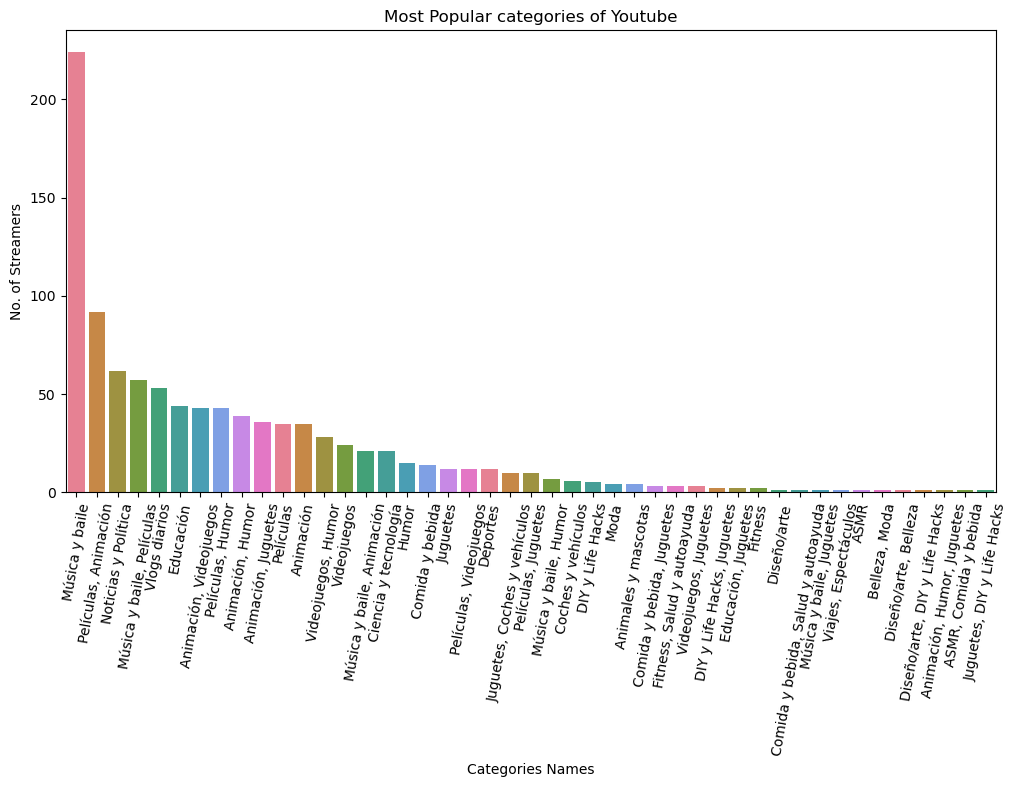

In [26]:
category_counts = df['Categories'].value_counts()
custom_palette = sns.color_palette("husl", n_colors=len('categories'))
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y =category_counts.values, palette=custom_palette)
plt.title("Most Popular categories of Youtube")
plt.xlabel('Categories Names')
plt.ylabel('No. of Streamers')
plt.xticks(rotation=80)
plt.show()

In [27]:
correlation1 = df['Subscribers'].corr(df['Likes'])
correlation1

0.21139580409439582

In [28]:
correlation2 = df['Subscribers'].corr(df['Comments'])
correlation2

0.035985446459772315

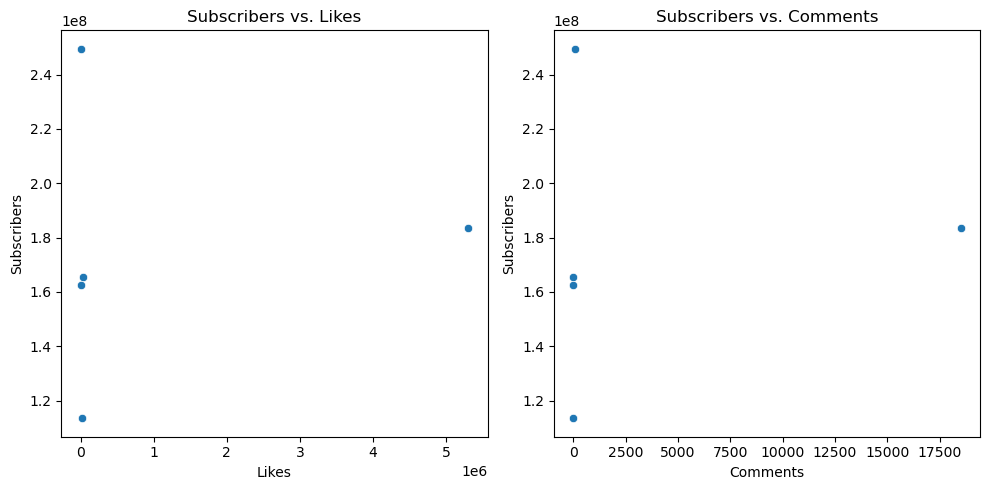

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=top_streamers, y='Subscribers', x='Likes')
plt.title('Subscribers vs. Likes')

plt.subplot(1, 2, 2)
sns.scatterplot(data=top_streamers, y='Subscribers', x='Comments')
plt.title('Subscribers vs. Comments')

plt.tight_layout()
plt.show()

# 3- Audience Study
- Analyze the distribution of streamers audiences by country.
- Are there regional preferences for specific content categories?

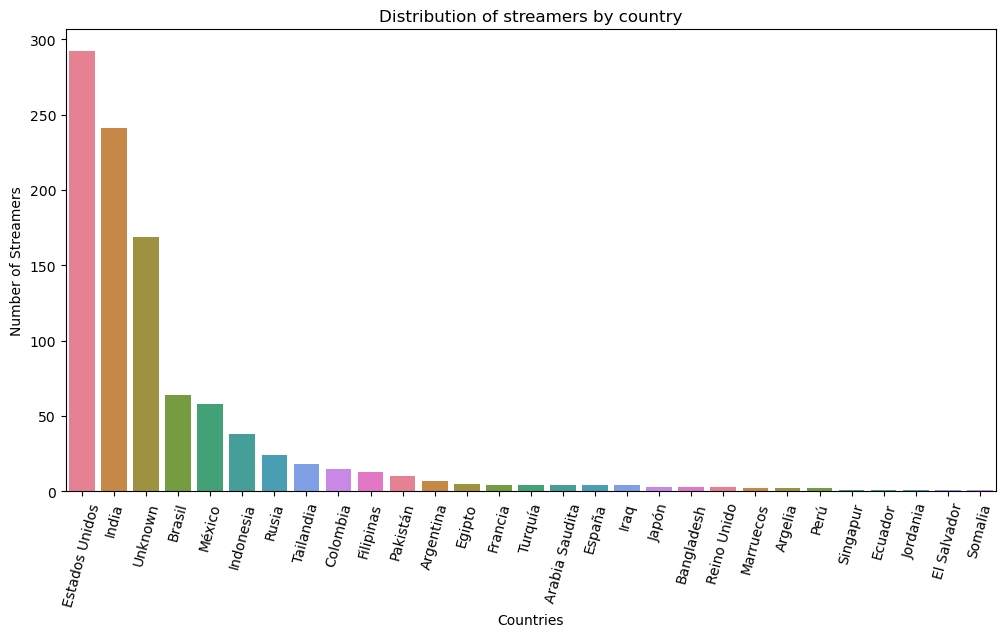

In [39]:
country_counts = df['Country'].value_counts()
custom_palette = sns.color_palette("husl", n_colors=len('categories'))
plt.figure(figsize=(12,6))
sns.barplot(x = country_counts.index, y = country_counts.values, palette = custom_palette)
plt.title("Distribution of streamers by country")
plt.xlabel('Countries')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=75)
plt.show()

In [41]:
category_counts = df.groupby(['Country','Categories'])['Username'].count().unstack().fillna(0)

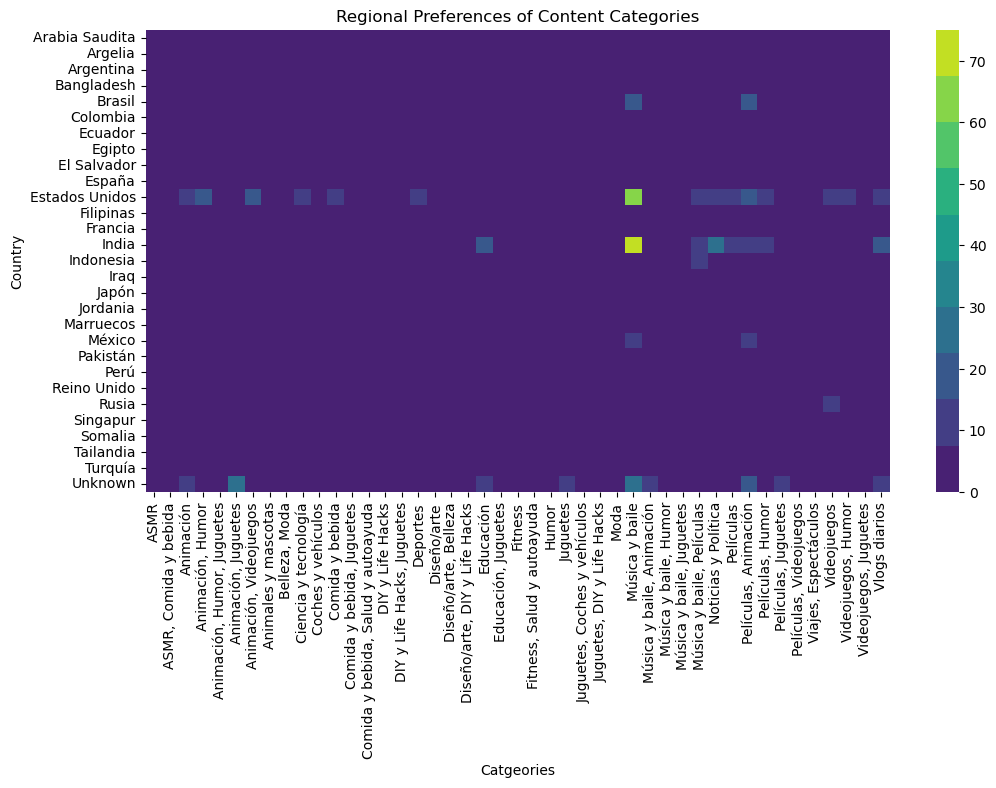

In [43]:
custom_palette1 = sns.color_palette("viridis", n_colors=len('categories'))
plt.figure(figsize=(12,6))
sns.heatmap(category_counts, cmap=custom_palette1)
plt.title('Regional Preferences of Content Categories')
plt.xlabel('Catgeories')
plt.ylabel('Country')
plt.show()

# 4- Performance Metrics
- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

In [51]:
Subscribers_avg = df['Subscribers'].mean()
Visits_avg = df['Visits'].mean()
Likes_avg = df['Likes'].mean()
Comments_avg = df['Comments'].mean()

print(f"Average Subscribers: {Subscribers_avg}")
print(f"Average Visits: {Visits_avg}")
print(f"Average Likes: {Likes_avg}")
print(f"Average Comments: {Comments_avg}")

Average Subscribers: 21930382.293762576
Average Visits: 1215600.921026157
Average Likes: 53902.42957746479
Average Comments: 1296.1569416498994


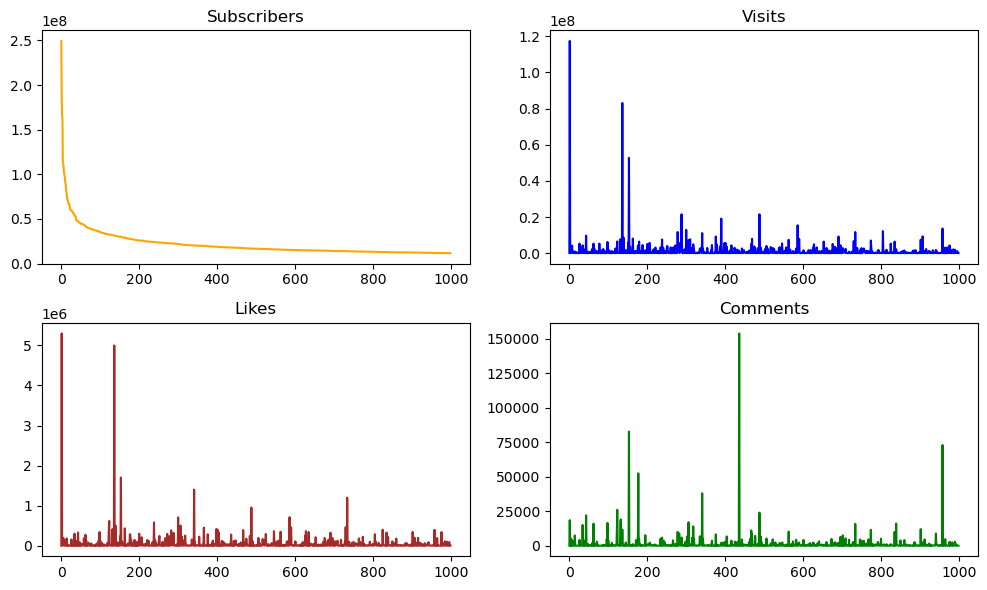

In [54]:
# Plotting
plt.figure(figsize=(10, 6))

#Subscribers
plt.subplot(2, 2, 1)
plt.plot( df['Subscribers'], color='orange')
plt.title('Subscribers')

# Visits
plt.subplot(2, 2, 2)
plt.plot( df['Visits'], color='blue')
plt.title('Visits')

#Likes
plt.subplot(2, 2, 3)
plt.plot( df['Likes'], color='brown')
plt.title('Likes')

# Comments
plt.subplot(2, 2, 4)
plt.plot( df['Comments'], color='green')
plt.title('Comments')

plt.tight_layout()
plt.show()

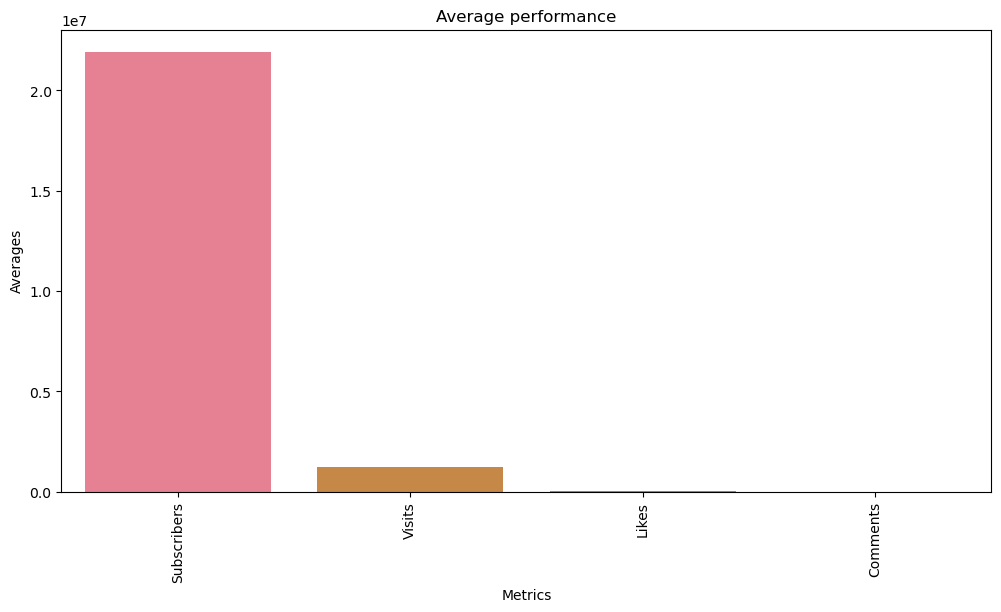

In [56]:
metrics = ['Subscribers','Visits','Likes','Comments']
averages = [Subscribers_avg, Visits_avg, Likes_avg, Comments_avg]
custom_palette = sns.color_palette("husl", n_colors=len('categories'))
plt.figure(figsize=(12,6))
sns.barplot(x=metrics, y =averages, palette = custom_palette)
plt.title("Average performance")
plt.xlabel('Metrics')
plt.ylabel('Averages')
plt.xticks(rotation=90)
plt.show()

D:\Hassam\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


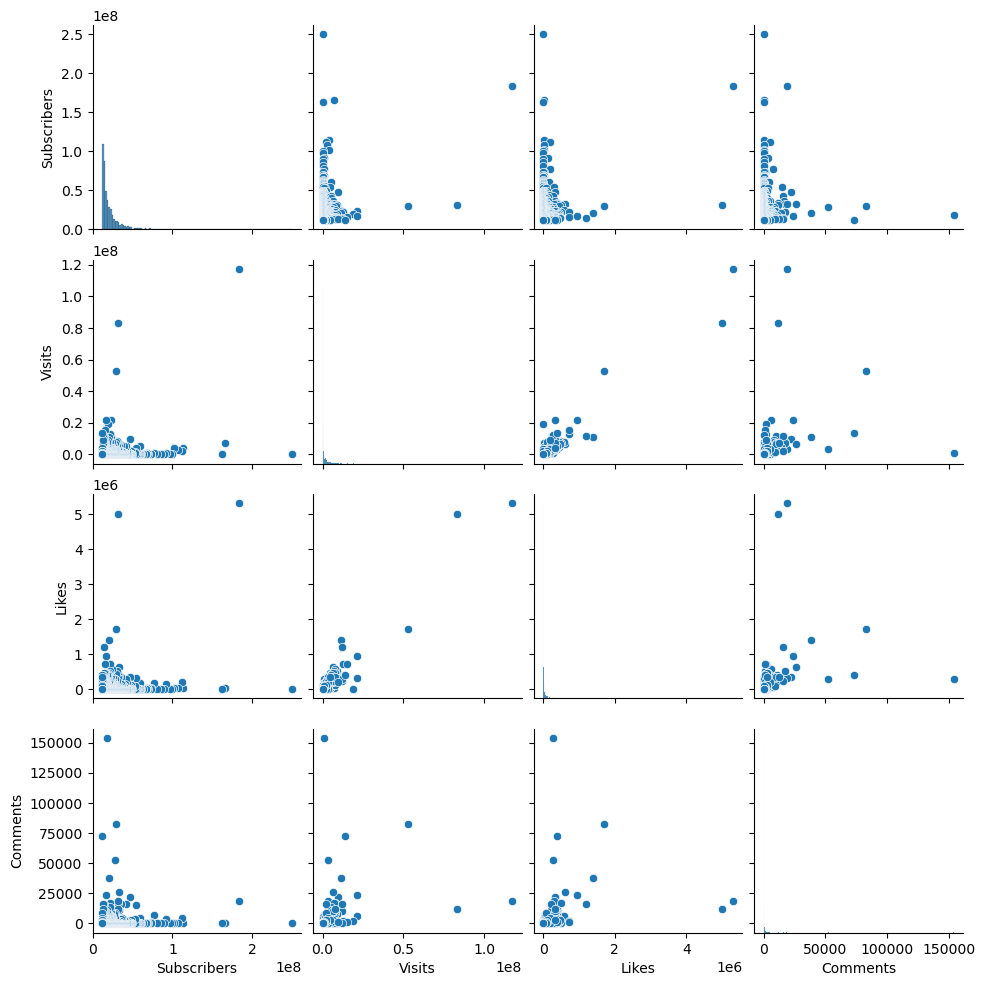

In [64]:
sns.pairplot(df[metrics])
plt.show()

# 5- Content Categories
- Explore the distribution of content categories. Which categories have the highest number of streamers?
- Are there specific categories with exceptional performance metrics?

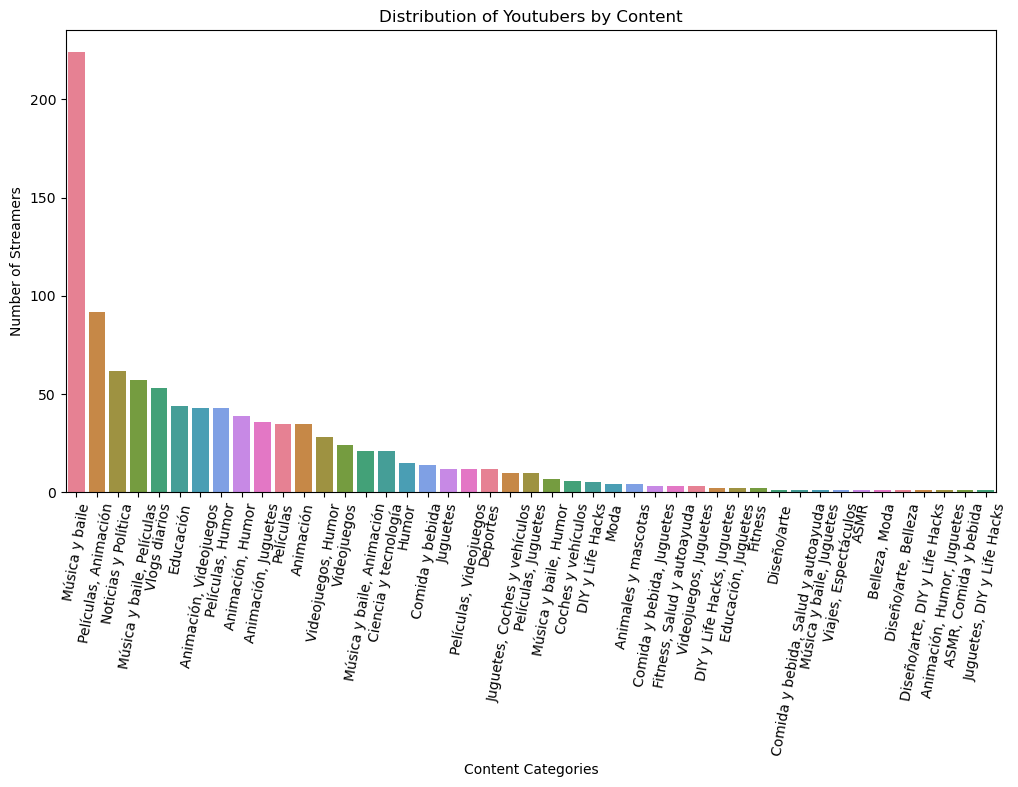

In [66]:
category_counts1 = df['Categories'].value_counts()
custom_palette = sns.color_palette("husl", n_colors=len('categories'))
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts1.index, y=category_counts1.values, palette = custom_palette)
plt.title('Distribution of Youtubers by Content')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=80)
plt.show()

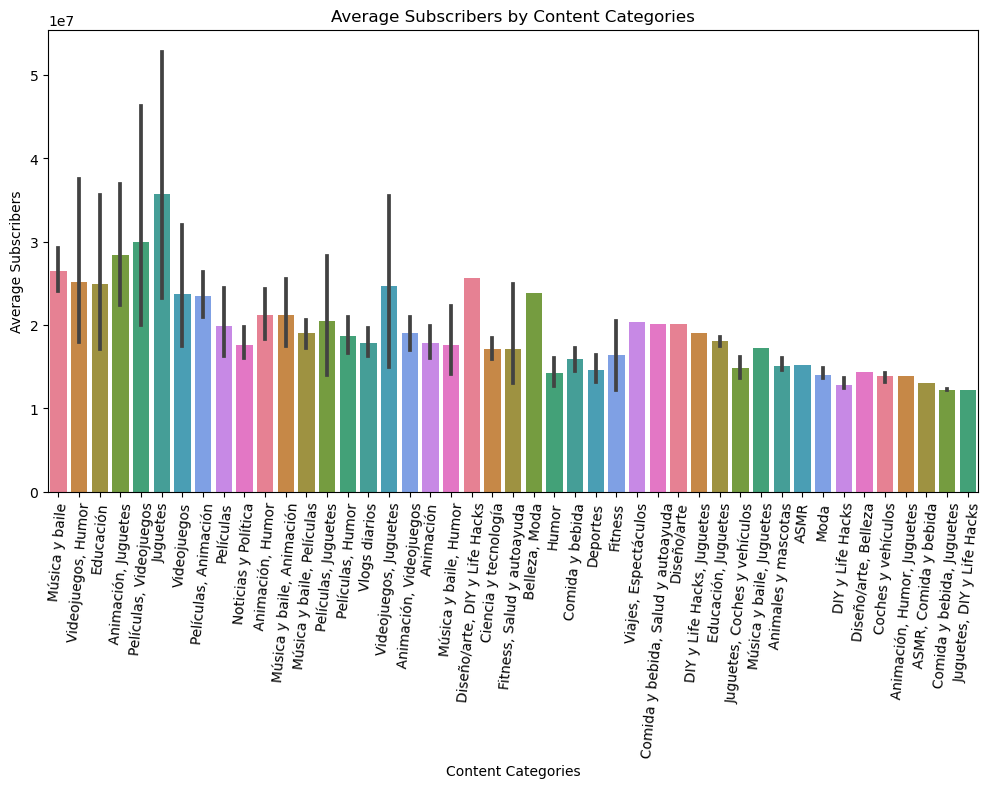

In [70]:
custom_palette = sns.color_palette("husl", n_colors=len('categories'))
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Categories', y='Subscribers' , palette = custom_palette)
plt.title('Average Subscribers by Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=85)
plt.show()

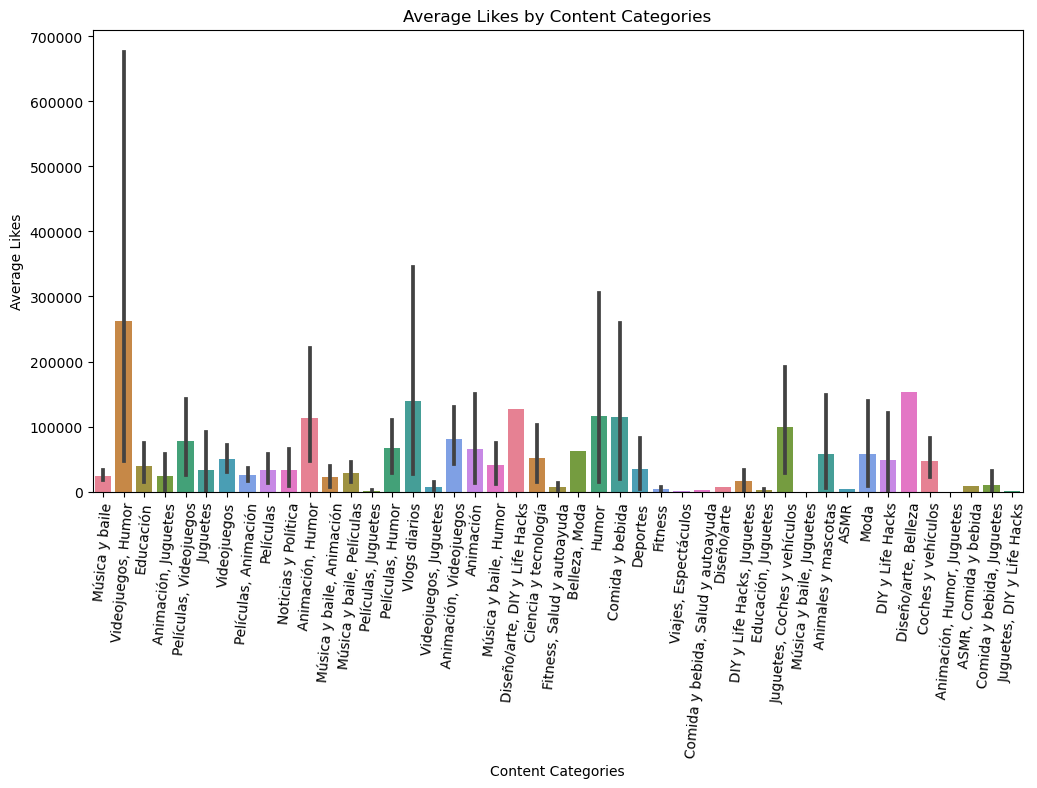

In [71]:
custom_palette = sns.color_palette("husl", n_colors=len('categories'))
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Categories', y='Likes' , palette = custom_palette)
plt.title('Average Likes by Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Average Likes')
plt.xticks(rotation=85)
plt.show()

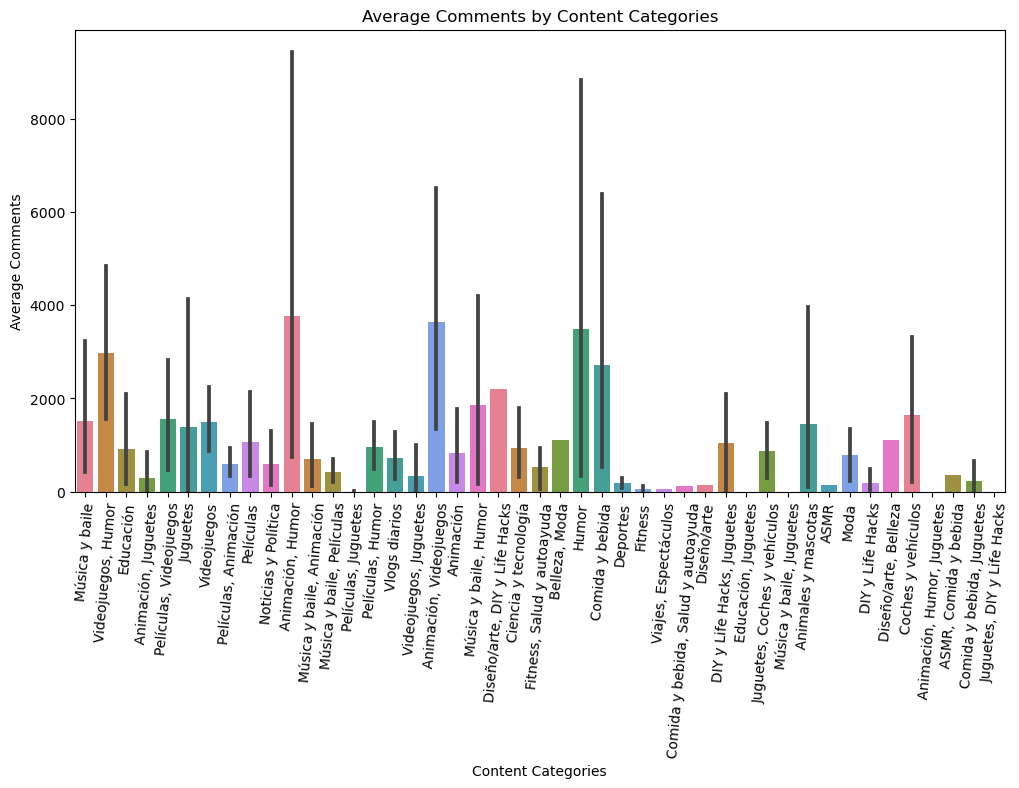

In [72]:
custom_palette = sns.color_palette("husl", n_colors=len('categories'))
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Categories', y='Comments' , palette = custom_palette)
plt.title('Average Comments by Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Average Comments')
plt.xticks(rotation=85)
plt.show()

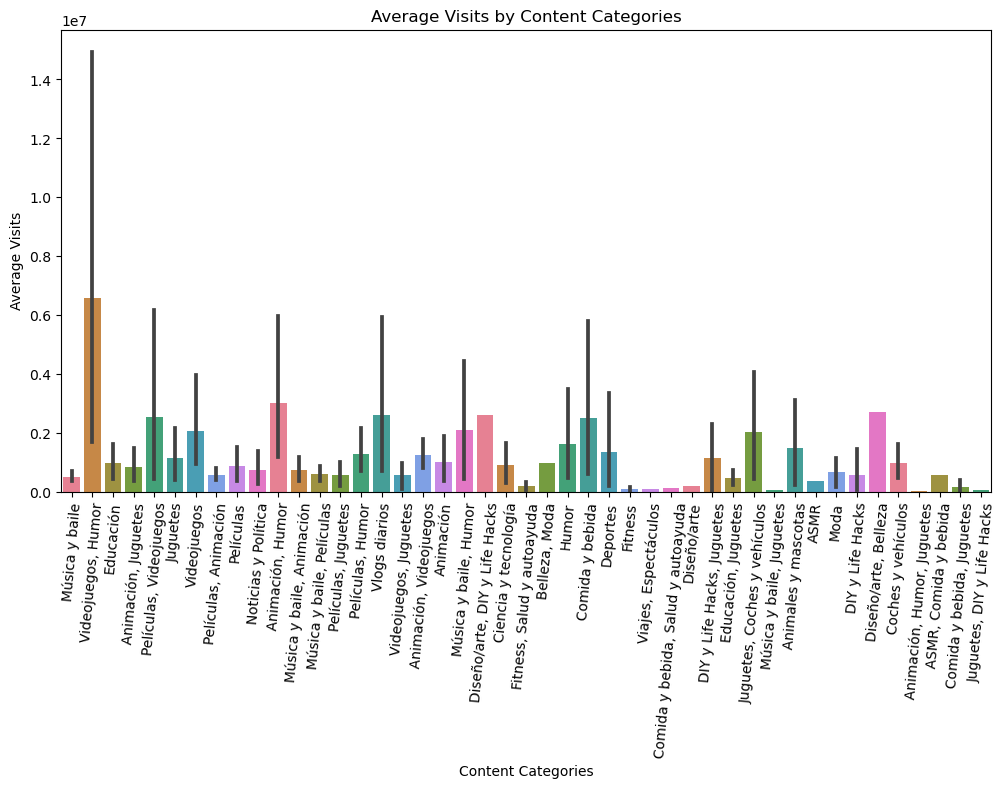

In [73]:
custom_palette = sns.color_palette("husl", n_colors=len('categories'))
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Categories', y='Visits' , palette = custom_palette)
plt.title('Average Visits by Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Average Visits')
plt.xticks(rotation=85)
plt.show()

In [75]:
performance_metrics = ['Subscribers', 'Likes', 'Comments', 'Visits']
for metric in performance_metrics:
    z_scores = (df[metric] - df[metric].mean()) / df[metric].std()
    exceptional_categories = df[z_scores.abs() > 2]['Categories'].unique()
    print(f'Exceptional Categories of {metric.capitalize()}: {", ".join(exceptional_categories)}')

Exceptional Categories of Subscribers: Música y baile, Videojuegos, Humor, Educación, Animación, Juguetes, Películas, Videojuegos, Juguetes, Videojuegos, Películas, Animación, Películas, Noticias y Política
Exceptional Categories of Likes: Videojuegos, Humor, Animación, Videojuegos, Vlogs diarios, Animación, Humor, Películas, Humor, Humor, Comida y bebida, Noticias y Política, Animación
Exceptional Categories of Comments: Videojuegos, Humor, Música y baile, Animación, Humor, Juguetes, Animación, Videojuegos, Educación, Humor, Comida y bebida, Animación, Noticias y Política
Exceptional Categories of Visits: Videojuegos, Humor, Vlogs diarios, Animación, Humor, Películas, Videojuegos, Películas, Humor, Videojuegos, Comida y bebida, Noticias y Política, Deportes, Música y baile


# 6- Brands & Collaboration
- Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.

In [77]:
# Define High Performance Metrics
high_subs_threshold = df['Subscribers'].quantile(0.75, interpolation="nearest")
high_likes_threshold = df['Likes'].quantile(0.75, interpolation="nearest")
high_comments_threshold = df['Comments'].quantile(0.75, interpolation="nearest")
high_visits_threshold = df['Visits'].quantile(0.75, interpolation="nearest")

In [80]:
# Identify High-Performance Streamers
df['HighPerformance'] = ((df['Subscribers'] >= high_subs_threshold) &
                           (df['Likes'] >= high_likes_threshold) &
                           (df['Comments'] >= high_comments_threshold) &
                            (df['Visits'] >= high_visits_threshold))

In [81]:
# Analyze Engagement with Brands or Marketing Campaigns:
df['Engagement'] = df['Likes'] + df['Comments'] + df['Visits']

high_performance_engagement = df[df['HighPerformance']]['Engagement'].sum()
low_performance_engagement = df[~df['HighPerformance']]['Engagement'].sum()

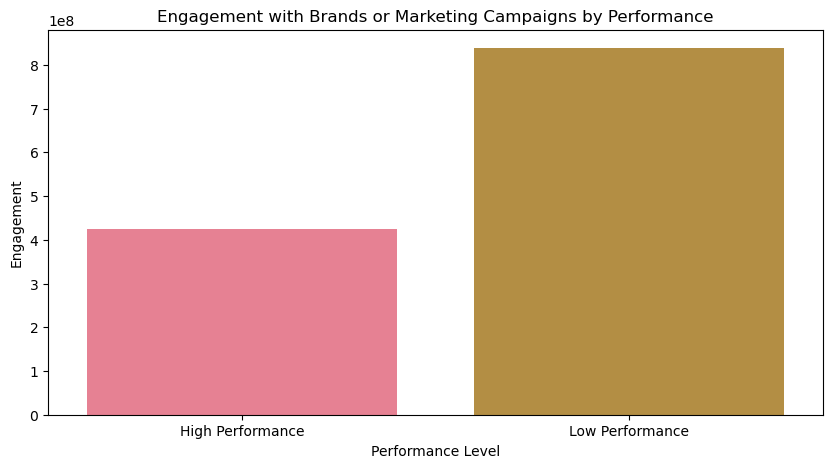

In [82]:
# Visualize the results:
custom_palette = sns.color_palette("husl", n_colors=len('metrics'))
plt.figure(figsize=(10, 5))
sns.barplot(x=['High Performance', 'Low Performance'], y=[high_performance_engagement, low_performance_engagement], palette = custom_palette)
plt.title('Engagement with Brands or Marketing Campaigns by Performance')
plt.xlabel('Performance Level')
plt.ylabel('Engagement')
plt.show()

In [83]:
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,HighPerformance,Engagement
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,False,88978.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,True,122718500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,False,7024700.0
3,4,SETIndia,Educación,162600000.0,India,15600.0,166.0,9.0,False,15775.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,False,3912400.0


# 7- Benchmarking
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [86]:
# Identify Top-Performing Streamers:
df['AboveAvgSubscribers'] = df['Subscribers'] > Subscribers_avg
df['AboveAvgVisits'] = df['Visits'] > Visits_avg
df['AboveAvgLikes'] = df['Likes'] > Likes_avg
df['AboveAvgComments'] = df['Comments'] > Comments_avg

In [87]:
# List the Top-Performing Content Creators:
top_streamers = df[df['AboveAvgSubscribers'] & df['AboveAvgVisits'] & df['AboveAvgLikes'] & df['AboveAvgComments']]
print(top_streamers)

     Rank               Username                     Categories  Subscribers  \
1       2                MrBeast             Videojuegos, Humor  183500000.0   
5       6              PewDiePie         Películas, Videojuegos  111500000.0   
26     27            dudeperfect                    Videojuegos   59700000.0   
34     35            TaylorSwift                 Música y baile   54100000.0   
39     40            JuegaGerman           Películas, Animación   48600000.0   
43     44               A4a4a4a4               Animación, Humor   47300000.0   
58     59              Mikecrack           Películas, Animación   43400000.0   
62     63         KimberlyLoaiza                 Música y baile   42100000.0   
64     65        luisitocomunica                 Música y baile   41100000.0   
70     71            JessNoLimit           Películas, Animación   39600000.0   
96     97         TotalGaming093         Películas, Videojuegos   36300000.0   
98     99   TechnoGamerzOfficial        

# 8- Content Recommendations
- Propose a system for enhancing content recommendations to YouTube users based on streamer's categories and performance metrics.

In [88]:
user_matrix = df.pivot_table(index='Username', columns='Categories', values='Subscribers', fill_value=0)
user_matrix

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,Películas,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos","Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Username,,,,,,,,,,,,,,,,,,,,,
-genevievesplayhouse1465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GOSpanish,0,0,13900000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GO_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1MILLION_Dance,0,0,0,0,0,0,0,0,0,0,...,0,0,26300000,0,0,0,0,0,0,0
1theK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeetv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeetvtelugu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zhong,0,0,31400000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Calculate cosine similarity between streamers based on the user-item matrix
cosine_sim = cosine_similarity(user_matrix)
print (cosine_sim)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [92]:
# Define a function to get content recommendations based on a given streamer
def get_recommendations(username, cosine_sim=cosine_sim):
    idx = user_matrix.index.get_loc(username)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 most similar streamers
    streamer_indices = [i[0] for i in sim_scores]
    return user_matrix.index[streamer_indices]

In [93]:
# Example usage: Get recommendations for a specific streamer
recommended_streamers = get_recommendations('MrBeast')
print(recommended_streamers)

Index(['DUDUeCAROL', 'GMM25Thailand', 'GyanGaming', 'IShowSpeed', 'Jesser',
       'MartaAndRustam', 'Mashaurso', 'MrBeast', 'PrestonYT', 'Sidemen'],
      dtype='object', name='Username')
